# Box-Cox transformation: preprocessing.PowerTransformer(method='box-cox')
* sklearn help: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html
* concept: https://blog.minitab.com/blog/applying-statistics-in-quality-projects/how-could-you-benefit-from-a-box-cox-transformation

* author: Prasert Kanawattanachai
* e-mail: prasert.k@chula.ac.th
* Chulalongkorn Business School, Thailand

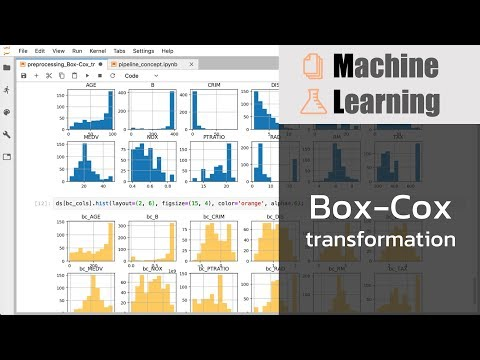

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('v6Jfxs3EmXQ', width=720, height=405)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
print(f'pandas  version = {pd.__version__}')
print(f'numpy   version = {np.__version__}')
print(f'seaborn version = {sns.__version__}')

pandas  version = 1.3.4
numpy   version = 1.20.3
seaborn version = 0.11.2


# Boston House Prices
https://www.kaggle.com/vikrishnan/boston-house-prices

* CRIM     per capita crime rate by town
* ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS    proportion of non-retail business acres per town
* CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX      nitric oxides concentration (parts per 10 million)
* RM       average number of rooms per dwelling
* AGE      proportion of owner-occupied units built prior to 1940
* DIS      weighted distances to five Boston employment centres
* RAD      index of accessibility to radial highways
* TAX      full-value property-tax rate per \$10,000
* PTRATIO  pupil-teacher ratio by town
* B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT    % lower status of the population
* MEDV     Median value of owner-occupied homes in $1000's

In [3]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/boston_house_price.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


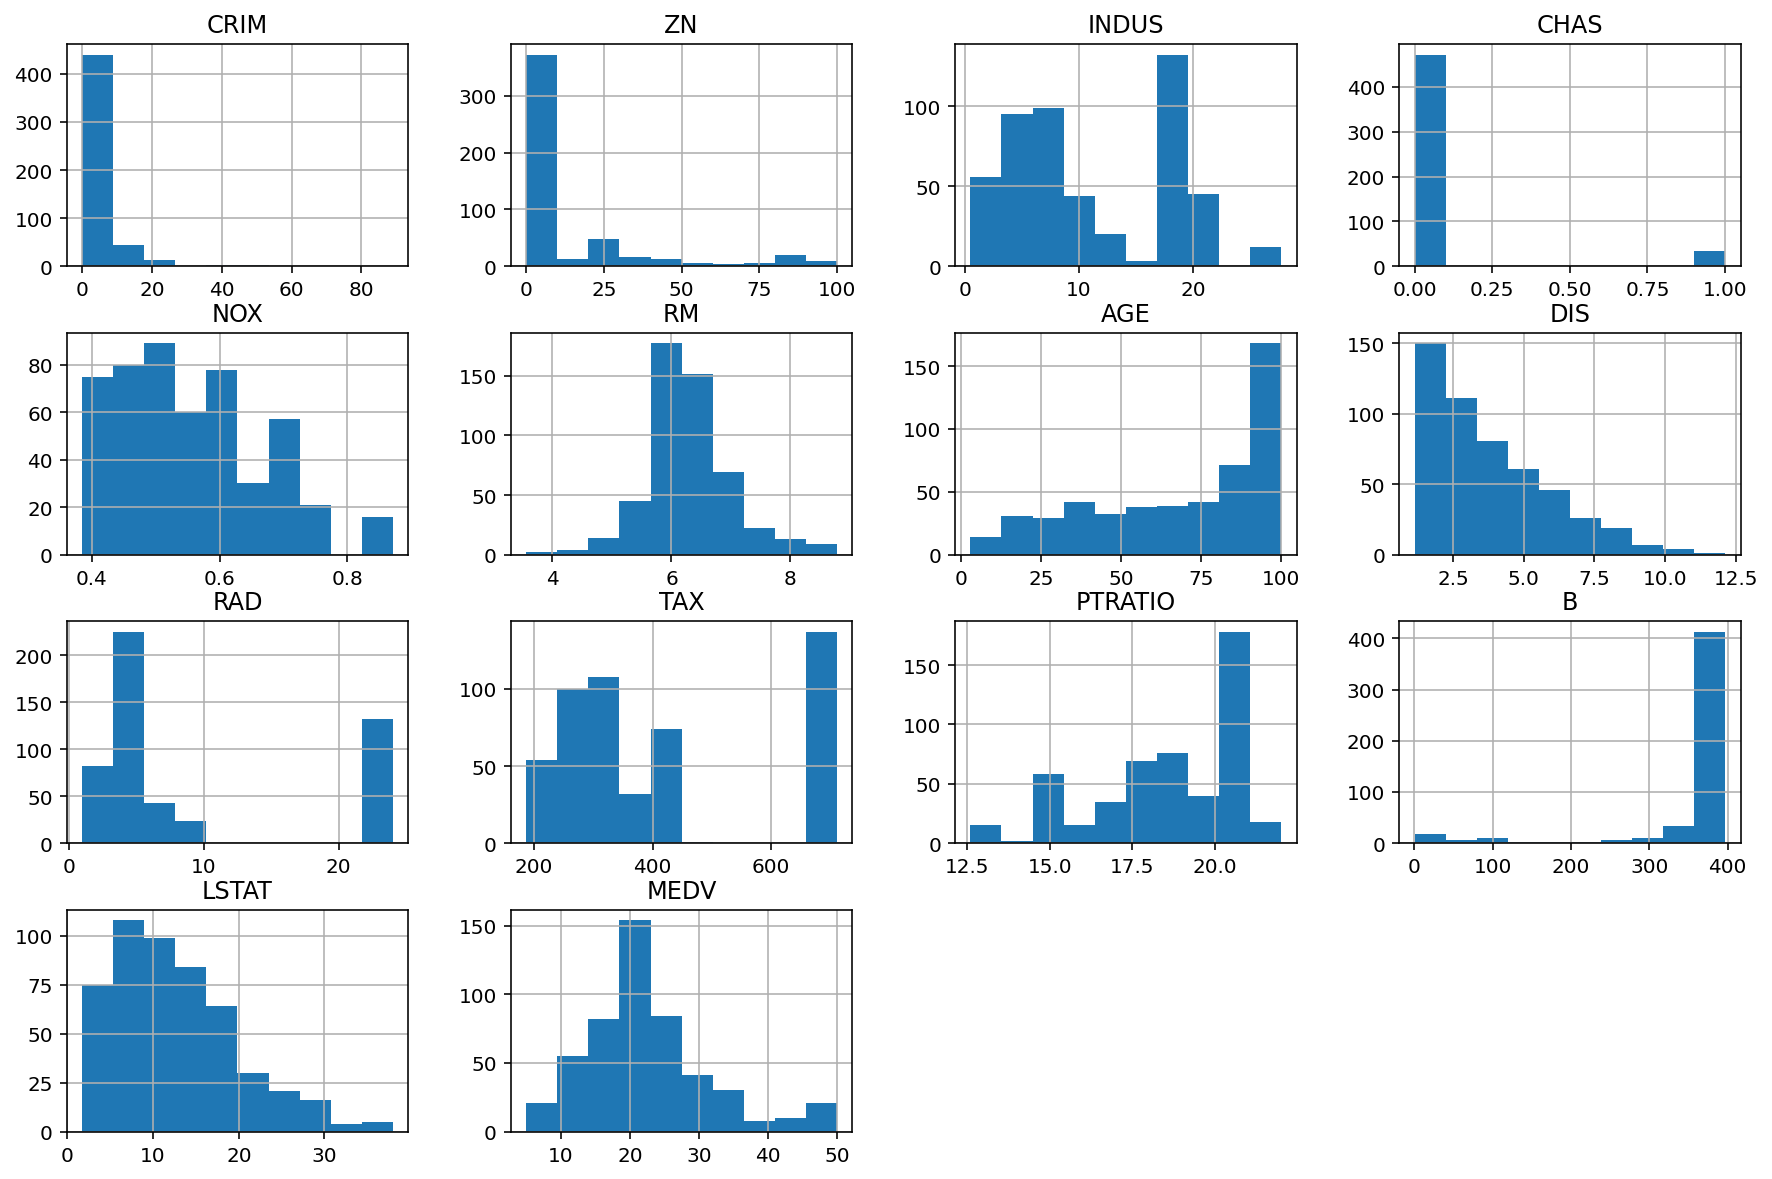

In [5]:
df.hist(figsize=(15, 10));

## sklearn preprocessing.PowerTransformer() --> ทำงานได้ดีกับตัวที่เบ้ขวา

In [28]:
from sklearn import preprocessing

In [29]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

###### Box-Cox

In [30]:
pt = preprocessing.PowerTransformer(method='box-cox', standardize=False) # support only positive value
cols=['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=False) # support 0, negative and positive values
# cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
mat = pt.fit_transform(df[cols])
mat[:5]

array([[-6.84399123e+00,  1.00873264e+00, -8.34416370e-01,
         2.96056804e+00,  2.01623543e+02,  1.26486975e+00,
         0.00000000e+00,  1.80725765e+00,  3.27453118e+04,
         9.05316298e+08,  1.93825661e+00,  4.57293637e+00],
       [-4.44783349e+00,  3.07396246e+00, -1.09240763e+00,
         2.90565758e+00,  2.60624267e+02,  1.41858500e+00,
         6.60260240e-01,  1.79657673e+00,  6.32534251e+04,
         9.05316298e+08,  2.87698253e+00,  4.36558166e+00],
       [-4.44893609e+00,  3.07396246e+00, -1.09240763e+00,
         3.17138552e+00,  1.84738608e+02,  1.41858500e+00,
         6.60260240e-01,  1.79657673e+00,  6.32534251e+04,
         8.71766316e+08,  1.64038750e+00,  5.33694273e+00],
       [-4.19447041e+00,  9.26595784e-01, -1.14039963e+00,
         3.10784343e+00,  1.25260171e+02,  1.57146011e+00,
         1.01752834e+00,  1.79164525e+00,  7.83922166e+04,
         8.86490580e+08,  1.22239639e+00,  5.25495447e+00],
       [-3.12283788e+00,  9.26595784e-01, -1.1403996

In [31]:
bc_cols = [f'bc_{c}' for c in cols]
bc_cols

['bc_CRIM',
 'bc_INDUS',
 'bc_NOX',
 'bc_RM',
 'bc_AGE',
 'bc_DIS',
 'bc_RAD',
 'bc_TAX',
 'bc_PTRATIO',
 'bc_B',
 'bc_LSTAT',
 'bc_MEDV']

In [32]:
ds=pd.concat([df, pd.DataFrame(mat, columns=bc_cols)], axis='columns')
ds.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,bc_NOX,bc_RM,bc_AGE,bc_DIS,bc_RAD,bc_TAX,bc_PTRATIO,bc_B,bc_LSTAT,bc_MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,-0.834416,2.960568,201.623543,1.264870,0.000000,1.807258,32745.311816,9.053163e+08,1.938257,4.572936
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,-1.092408,2.905658,260.624267,1.418585,0.660260,1.796577,63253.425063,9.053163e+08,2.876983,4.365582
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,-1.092408,3.171386,184.738608,1.418585,0.660260,1.796577,63253.425063,8.717663e+08,1.640387,5.336943
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,-1.140400,3.107843,125.260171,1.571460,1.017528,1.791645,78392.216639,8.864906e+08,1.222396,5.254954
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,-1.140400,3.158548,157.195622,1.571460,1.017528,1.791645,78392.216639,9.053163e+08,2.036925,5.428607


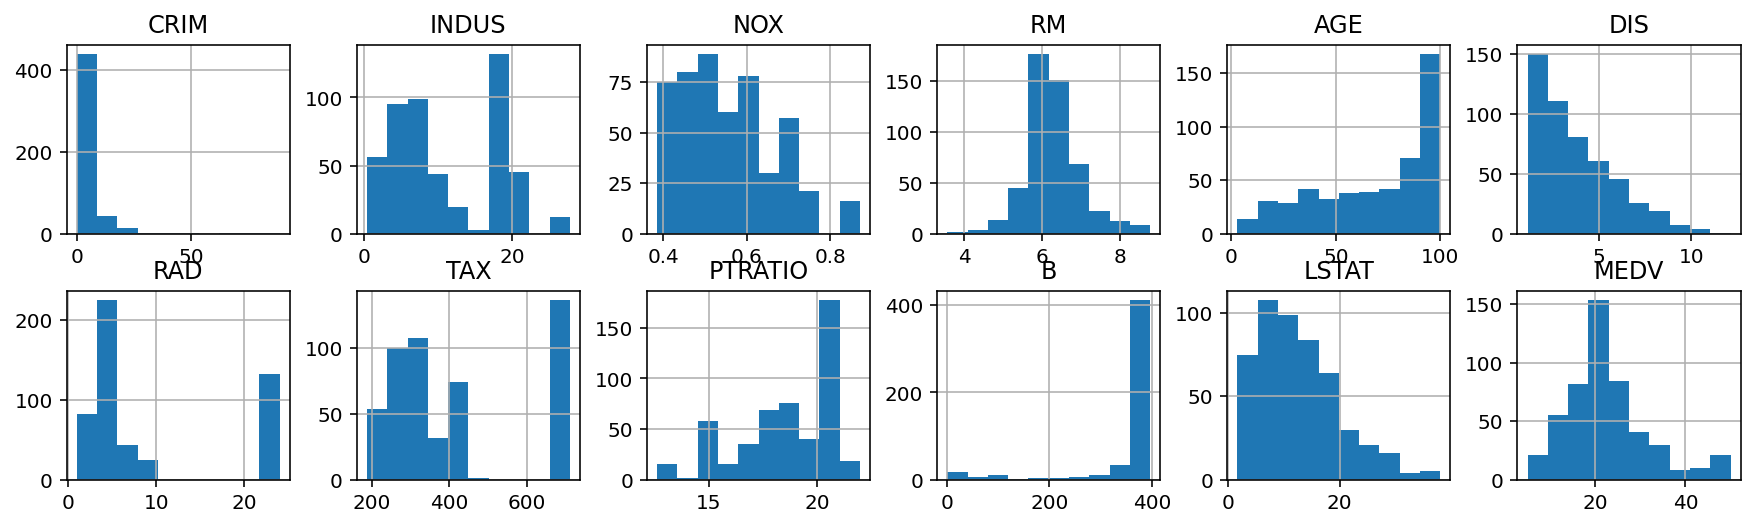

In [33]:
ds[cols].hist(layout=(2, 6), figsize=(15, 4)); # ก่อนใช้ Powertransformer Box-Cox

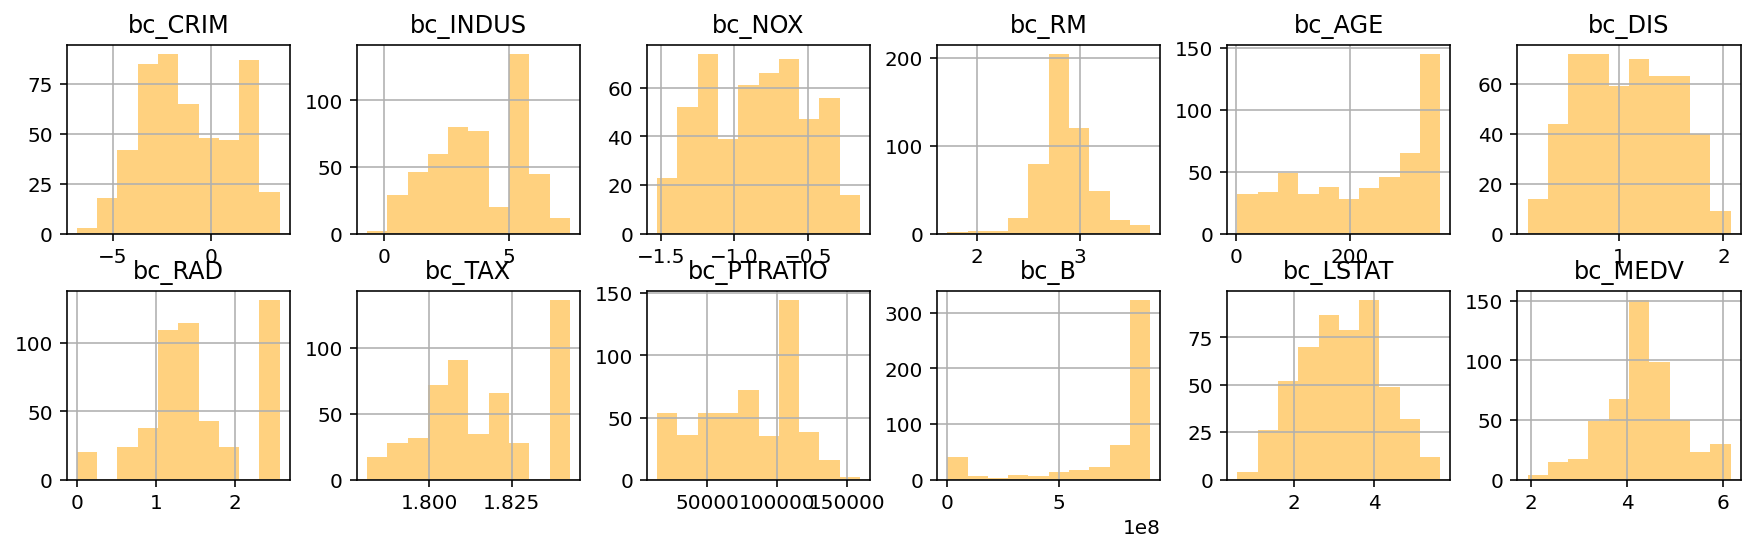

In [34]:
ds[bc_cols].hist(layout=(2, 6), figsize=(15, 4), color='orange', alpha=.5); # หลังใช้ Powertransformer Box-Cox

###### Yeo-Johnson

In [35]:
# pt = preprocessing.PowerTransformer(method='box-cox', standardize=False) # support only positive value
# cols=['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=False) # support 0, negative and positive values
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
mat = pt.fit_transform(df[cols])
mat[:5]

array([[ 6.28121965e-03,  1.02777430e+00,  1.51475638e+00,
        -0.00000000e+00,  2.06166305e-01,  2.89068244e+00,
         2.24200302e+02,  1.15467833e+00,  6.10653121e-01,
         1.79685875e+00,  7.34589629e+04,  1.75799201e+09,
         2.05839071e+00,  4.28671878e+00],
       [ 2.66004349e-02, -0.00000000e+00,  3.18396348e+00,
        -0.00000000e+00,  1.97064650e-01,  2.85050995e+00,
         2.90105332e+02,  1.22859142e+00,  9.01041783e-01,
         1.78645423e+00,  1.40762652e+05,  1.75799201e+09,
         2.78252151e+00,  4.11362695e+00],
       [ 2.65814602e-02, -0.00000000e+00,  3.18396348e+00,
        -0.00000000e+00,  1.97064650e-01,  3.04465929e+00,
         2.05387487e+02,  1.22859142e+00,  9.01041783e-01,
         1.78645423e+00,  1.40762652e+05,  1.69101315e+09,
         1.83365637e+00,  4.92208290e+00],
       [ 3.13779520e-02, -0.00000000e+00,  1.45215471e+00,
        -0.00000000e+00,  1.95409614e-01,  2.99829487e+00,
         1.39321694e+02,  1.30137780e+00,  1.

In [36]:
yj_cols = [f'yj_{c}' for c in cols]
yj_cols

['yj_CRIM',
 'yj_ZN',
 'yj_INDUS',
 'yj_CHAS',
 'yj_NOX',
 'yj_RM',
 'yj_AGE',
 'yj_DIS',
 'yj_RAD',
 'yj_TAX',
 'yj_PTRATIO',
 'yj_B',
 'yj_LSTAT',
 'yj_MEDV']

In [37]:
ds1=pd.concat([df, pd.DataFrame(mat, columns=yj_cols)], axis='columns')
ds1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,yj_NOX,yj_RM,yj_AGE,yj_DIS,yj_RAD,yj_TAX,yj_PTRATIO,yj_B,yj_LSTAT,yj_MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,0.206166,2.890682,224.200302,1.154678,0.610653,1.796859,73458.962923,1.757992e+09,2.058391,4.286719
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,0.197065,2.850510,290.105332,1.228591,0.901042,1.786454,140762.652198,1.757992e+09,2.782522,4.113627
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,0.197065,3.044659,205.387487,1.228591,0.901042,1.786454,140762.652198,1.691013e+09,1.833656,4.922083
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,0.195410,2.998295,139.321694,1.301378,1.081963,1.781652,174199.594623,1.720399e+09,1.526384,4.854119
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,0.195410,3.035295,174.752009,1.301378,1.081963,1.781652,174199.594623,1.757992e+09,2.133595,4.997997


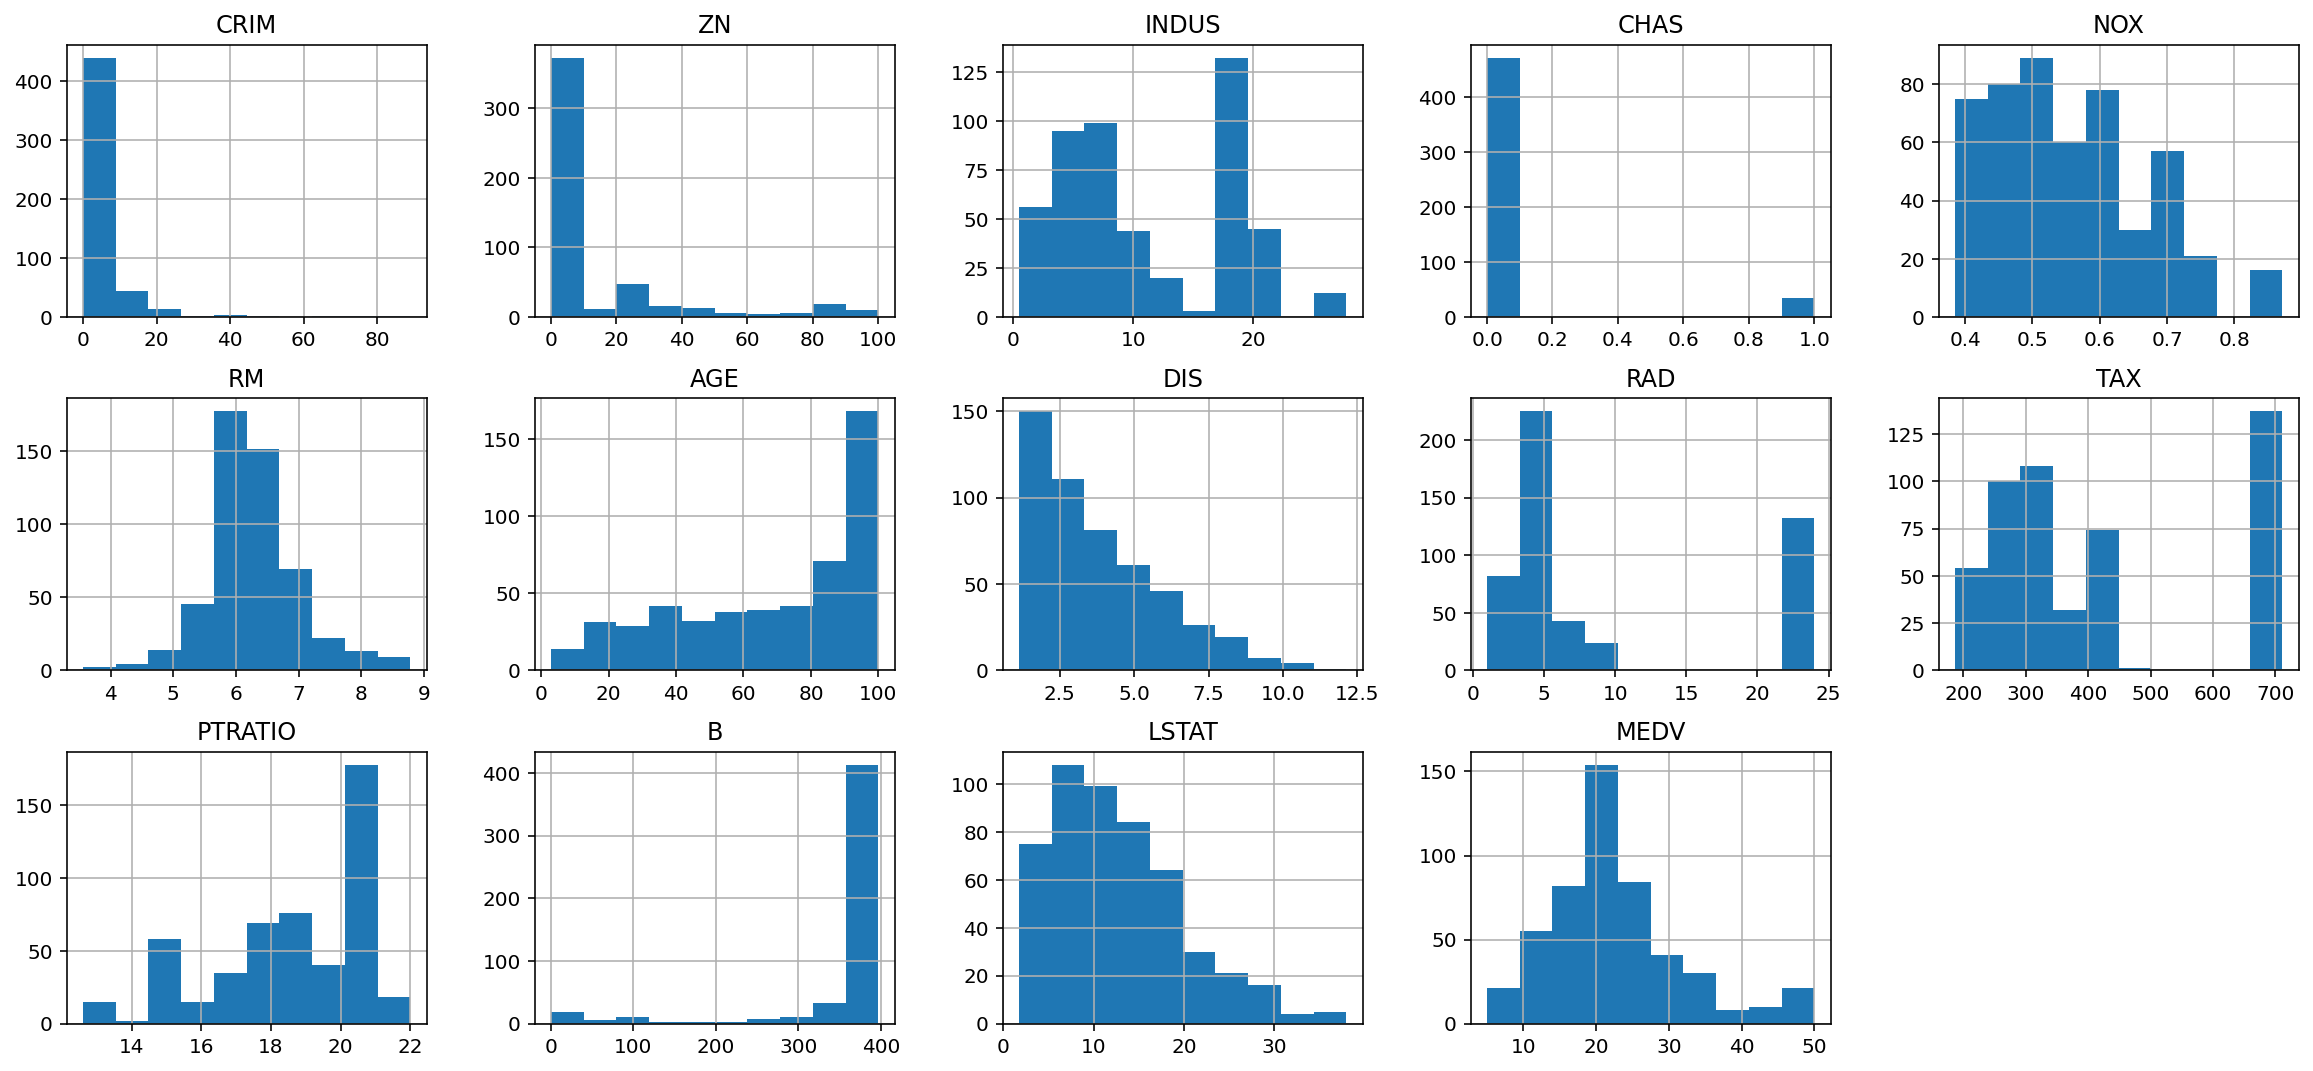

In [38]:
ds[cols].hist(layout=(3, 5), figsize=(20, 9));

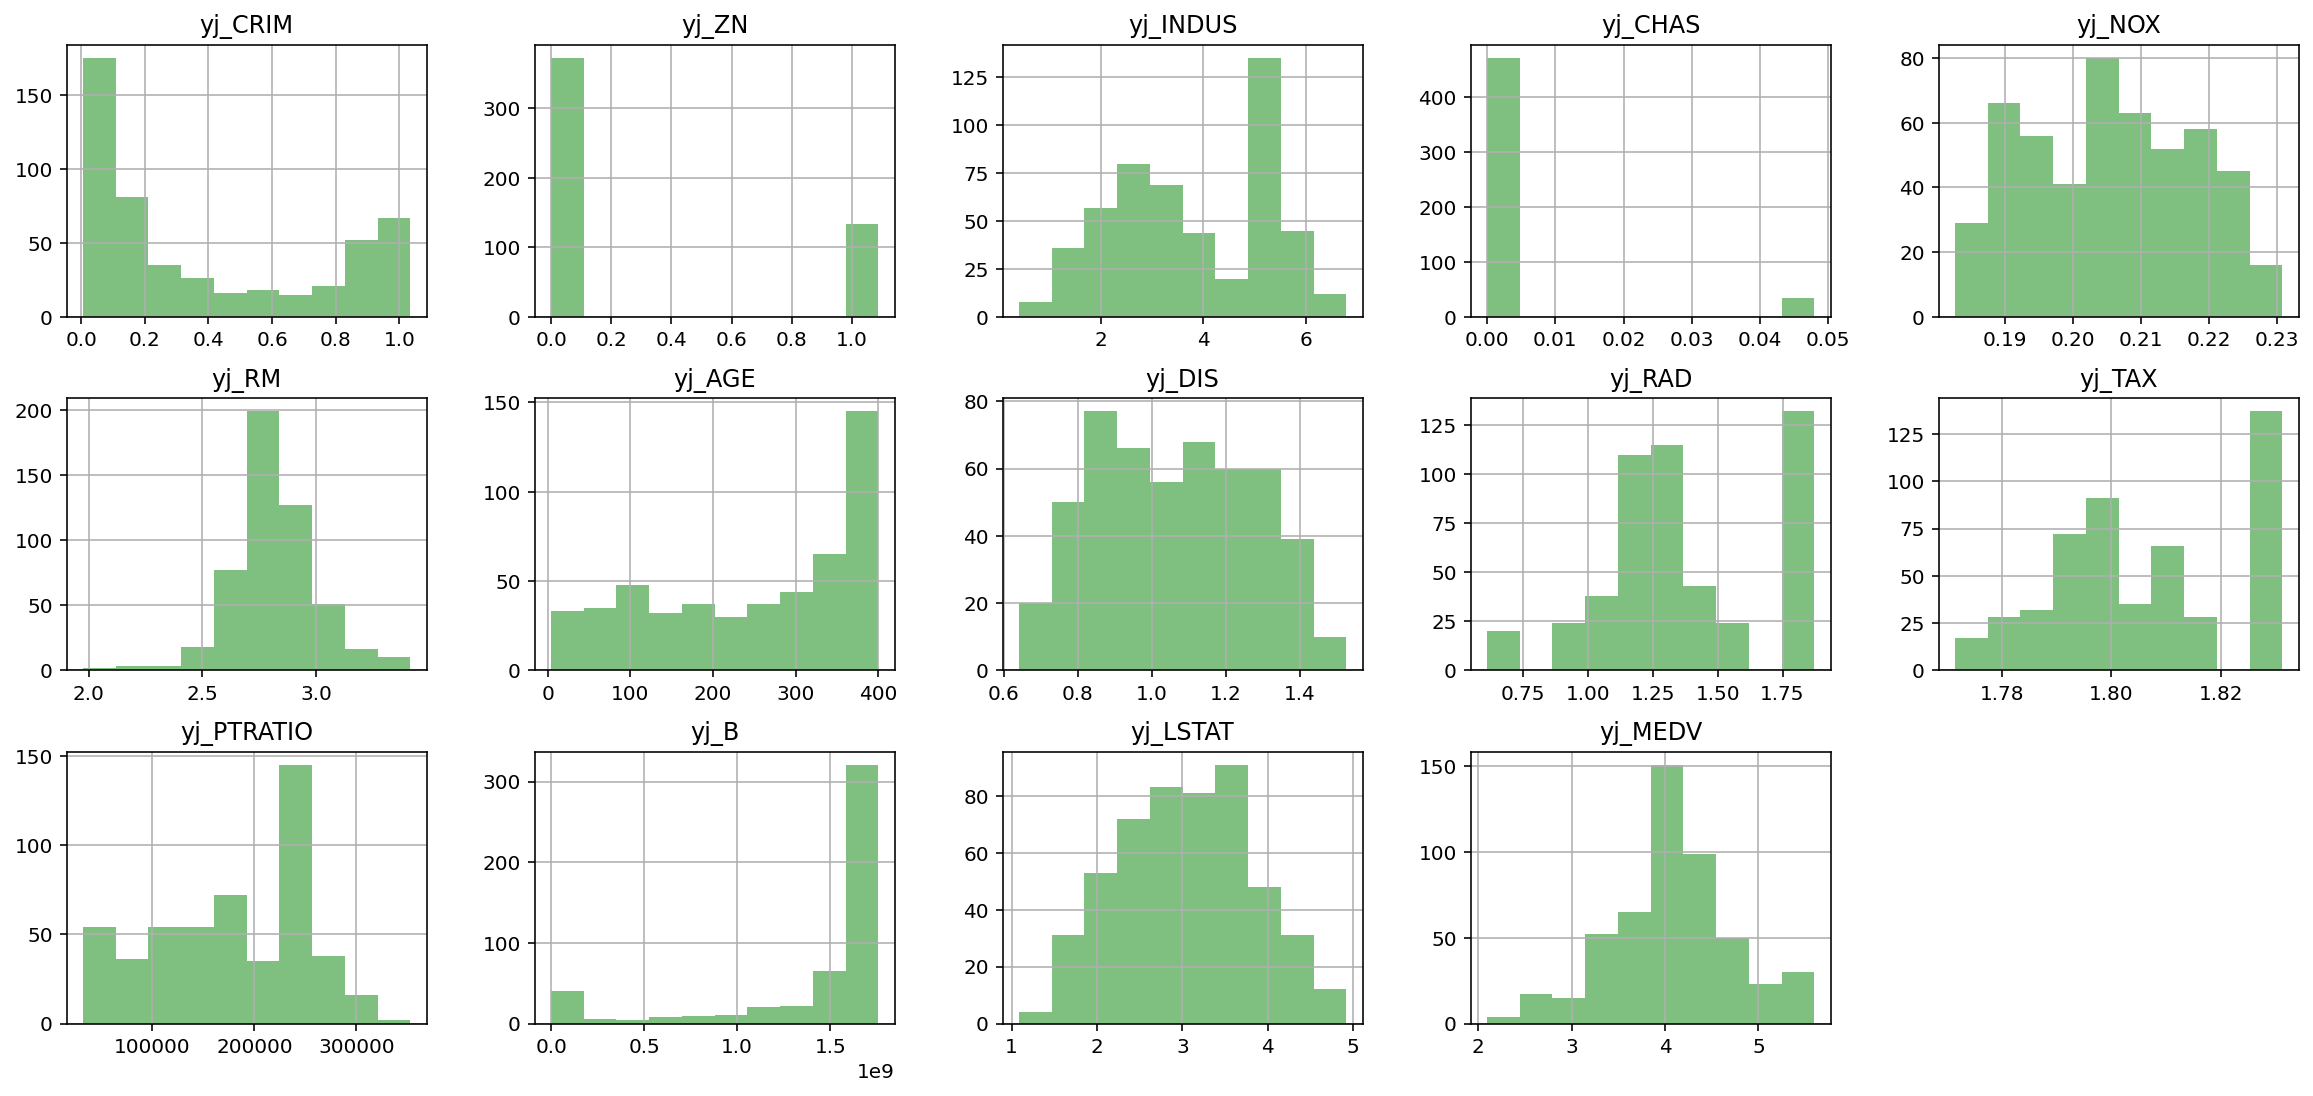

In [40]:
ds1[yj_cols].hist(layout=(3, 5), figsize=(20, 9), color='green', alpha=.5);